# eSports Earnings

This notebook includes:
* Exploring datasets obtained via webscraping
* Determine what game, game series, and game genre yields the most earnings
* Visualize year over year earning trends

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# NOTE: Datas gathered does not reflect the entire gaming industry; it is limited to publicly available information.
# Therefore, trends are also reflective of accessibility to information over time.
game_dataset = pd.read_csv("esports_dataset.csv")
print(game_dataset.shape)
print(game_dataset.describe())
game_dataset.head()

(1296, 7)
              year
count  1296.000000
mean   2013.399691
std       5.261425
min    1998.000000
25%    2010.000000
50%    2015.000000
75%    2018.000000
max    2020.000000


,game_title,game_series,game_genre,total_earnings,total_players,total_events,year
0,Dota 2,Dota,Multiplayer Online Battle Arena,"$1,373,248.00",150 Players,5 Tournaments,2020
1,Counter-Strike: Global Offensive,Counter-Strike,First-Person Shooter,"$766,846.46",524 Players,33 Tournaments,2020
2,Hearthstone,Hearthstone,Collectible Card Game,"$500,000.00",56 Players,1 Tournament,2020
3,Call of Duty: Modern Warfare,Call of Duty,First-Person Shooter,"$356,800.00",117 Players,3 Tournaments,2020
4,FIFA 20,FIFA,Sports,"$207,500.00",67 Players,2 Tournaments,2020


In [3]:
# We want to find out which game, series, and genre have the highest total earnings,
# earnings per player, and earnings per event. As well as year over year changes/stats. We'll want to group
# our data accordingly (by year, by title, by series, and by genre).

In [4]:
# First, let's prepare our game_dataset by converting strings to integers and floats for future calculations.
game_dataset['total_players'] = game_dataset['total_players'].map(lambda x: x.rstrip(' Players'))
game_dataset['total_players'] = game_dataset['total_players'].map(lambda x: int(x))
game_dataset['total_earnings'] = game_dataset['total_earnings'].map(lambda x: x.lstrip('$').replace(',',""))
game_dataset['total_earnings'] = game_dataset['total_earnings'].map(lambda x: float(x))
game_dataset['total_events'] = game_dataset['total_events'].map(lambda x: x.rstrip(' Tournaments'))
game_dataset['total_events'] = game_dataset['total_events'].map(lambda x: int(x))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
game_dataset

,game_title,game_series,game_genre,total_earnings,total_players,total_events,year
0,Dota 2,Dota,Multiplayer Online Battle Arena,1373248.00,150,5,2020
1,Counter-Strike: Global Offensive,Counter-Strike,First-Person Shooter,766846.46,524,33,2020
2,Hearthstone,Hearthstone,Collectible Card Game,500000.00,56,1,2020
3,Call of Duty: Modern Warfare,Call of Duty,First-Person Shooter,356800.00,117,3,2020
4,FIFA 20,FIFA,Sports,207500.00,67,2,2020
...,...,...,...,...,...,...,...
1291,Quake II,Quake,First-Person Shooter,42400.00,12,2,1999
1292,Quake II,Quake,First-Person Shooter,66200.00,16,4,1998
1293,QuakeWorld,Quake,First-Person Shooter,43500.00,12,3,1998
1294,StarCraft: Brood War,StarCraft,Strategy,20000.00,8,1,1998


In [5]:
# Before moving forward, let's quickly view which game had the highest single year earnings

In [6]:
game_dataset.iloc[game_dataset['total_earnings'].argmax()]

game_title             Fortnite
game_series            Fortnite
game_genre        Battle Royale
total_earnings      64422992.50
total_players              2273
total_events                350
year                       2019
Name: 55, dtype: object

In [7]:
# Interesting, it appears Fortnite yielded the greatest overall earnings in 2019. 
# Now, let's bifurcate our data into the following groupings: year, title, series, genre

In [8]:
group_by_year = game_dataset.groupby('year')['total_earnings','total_players','total_events'].sum()
group_by_year['earnings_pp'] = group_by_year['total_earnings']/group_by_year['total_players']
group_by_year['earnings_pe'] = group_by_year['total_earnings']/group_by_year['total_events']

group_by_title = game_dataset.groupby('game_title')['total_earnings','total_players','total_events'].sum()
group_by_title['earnings_pp'] = group_by_title['total_earnings']/group_by_title['total_players']
group_by_title['earnings_pe'] = group_by_title['total_earnings']/group_by_title['total_events']

group_by_series = game_dataset.groupby('game_series')['total_earnings','total_players','total_events'].sum()
group_by_series['earnings_pp'] = group_by_series['total_earnings']/group_by_series['total_players']
group_by_series['earnings_pe'] = group_by_series['total_earnings']/group_by_series['total_events']

group_by_genre = game_dataset.groupby('game_genre')['total_earnings','total_players','total_events'].sum()
group_by_genre['earnings_pp'] = group_by_genre['total_earnings']/group_by_genre['total_players']
group_by_genre['earnings_pe'] = group_by_genre['total_earnings']/group_by_genre['total_events']

In [9]:
print(group_by_year.head())
print(group_by_title.head())
print(group_by_series.head())
print(group_by_genre.head())

      total_earnings  total_players  total_events  earnings_pp  earnings_pe
year                                                                       
1998       131700.00             37             9      3559.46     14633.33
1999       275153.84             68            16      4046.38     17197.11
2000       745307.49            266            63      2801.91     11830.28
2001       893764.46            408            63      2190.60     14186.74
2002       968219.59            561            80      1725.88     12102.74
                          total_earnings  total_players  total_events  \
game_title                                                              
ARMS                            18198.09            128            81   
Acceleration of SUGURI 2          210.00              3             1   
Age of Empires                 190075.61            490            95   
Age of Empires II             1294323.46           1574           468   
Age of Empires III            

**Earnings Data by Year**

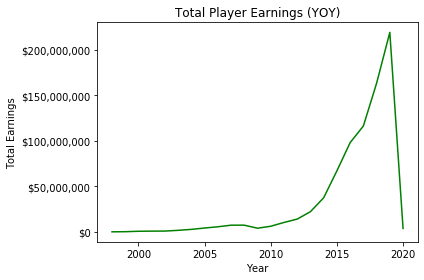

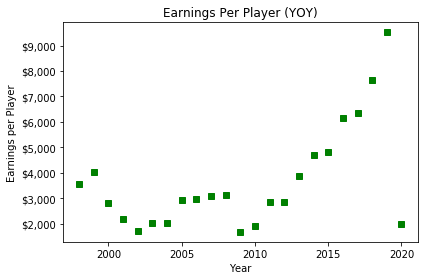

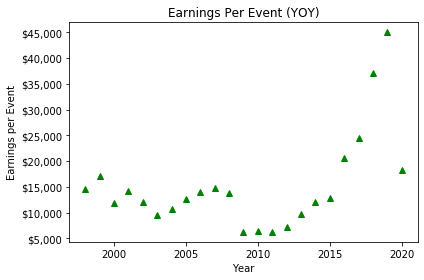

In [10]:
dates = np.arange(1998, 2021, 1)

fig, ax = plt.subplots()
ax.plot(dates, group_by_year['total_earnings'], 'g')
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Total Player Earnings (YOY)')
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.tight_layout()

fig, ax = plt.subplots()
ax.plot(dates, group_by_year['earnings_pp'], 'gs')
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Earnings Per Player (YOY)')
plt.xlabel('Year')
plt.ylabel('Earnings per Player')
plt.tight_layout()

fig, ax = plt.subplots()
ax.plot(dates, group_by_year['earnings_pe'], 'g^')
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Earnings Per Event (YOY)')
plt.xlabel('Year')
plt.ylabel('Earnings per Event')
plt.tight_layout()

plt.show()

In [11]:
# There seems to be a general upward trend in earnings on a total, per player, and per event basis;
# with considerable growth since 2010.

**Earnings Data by Title, Series, Genre**

In [12]:
# Let's explore our title dataset
group_by_title.describe()

,total_earnings,total_players,total_events,earnings_pp,earnings_pe
count,404.00,404.00,404.00,404.00,404.00
mean,1969466.38,332.43,92.50,inf,25269.78
std,13374446.80,1555.47,432.35,nan,55535.42
min,0.00,0.00,1.00,0.00,0.00
25%,6286.22,6.00,2.00,312.48,895.40
50%,50464.88,35.00,7.00,1629.07,5382.53
75%,282908.05,129.00,33.00,6145.22,23493.33
max,221281072.71,23918.00,5650.00,inf,500000.00


In [13]:
# We can already see issues (inf, nan) with "earnings_pp"; this is likely due to incomplete data.
# Therefore, let's set criteria for our analysis as it may be best to focus on popular games only.
# Let's only focus on games with total_earnings >= $100,000, total_players >= 10, and total_events >= 10.
# We'll apply these changes to title, series and genre groupings.

In [14]:
group_by_title = group_by_title[group_by_title.total_earnings >=100000]
group_by_title = group_by_title[group_by_title.total_players >=10]
group_by_title = group_by_title[group_by_title.total_events >=10]

group_by_series = group_by_series[group_by_series.total_earnings >=100000]
group_by_series = group_by_series[group_by_series.total_players >=10]
group_by_series = group_by_series[group_by_series.total_events >=10]

group_by_genre = group_by_genre[group_by_genre.total_earnings >=100000]
group_by_genre = group_by_genre[group_by_genre.total_players >=10]
group_by_genre = group_by_genre[group_by_genre.total_events >=10]

In [15]:
# Now lets' view Top 10 earnings by Title

In [16]:
te_t10_title = group_by_title.sort_values(by='total_earnings', ascending=False).iloc[0:10,0:1]
epp_t10_title = group_by_title.sort_values(by='earnings_pp', ascending=False).iloc[0:10,3:4]
epe_t10_title = group_by_title.sort_values(by='earnings_pe', ascending=False).iloc[0:10,4:5]
print(te_t10_title)
print(epp_t10_title)
print(epe_t10_title)

                                  total_earnings
game_title                                      
Dota 2                              221281072.71
Counter-Strike: Global Offensive     91840510.40
Fortnite                             84475824.64
League of Legends                    73427752.23
StarCraft II                         32294579.08
PLAYERUNKNOWN‚ÄôS BATTLEGROUNDS      21747809.48
Overwatch                            21700898.01
Hearthstone                          20283088.36
Heroes of the Storm                  18141257.92
Counter-Strike                       13485171.80
                            earnings_pp
game_title                             
Dota 2                         31557.48
Fortnite                       22739.12
Arena of Valor                 17475.84
Halo 5: Guardians              17223.12
Painkiller                     16916.67
Guns of Boom                   16562.50
Magic: The Gathering Arena     15129.19
Call of Duty: World War II     14937.54
H1Z1        

In [17]:
# Based on these results, the following titles appear on all three lists: Dota 2 & Fortnite. 
# These two games look promising if you want to make money as a pro gamer.
# Ok, Let's move on to series.

In [18]:
te_t10_series = group_by_series.sort_values(by='total_earnings', ascending=False).iloc[0:10,0:1]
epp_t10_series = group_by_series.sort_values(by='earnings_pp', ascending=False).iloc[0:10,3:4]
epe_t10_series = group_by_series.sort_values(by='earnings_pe', ascending=False).iloc[0:10,4:5]
print(te_t10_series)
print(epp_t10_series)
print(epe_t10_series)

                     total_earnings
game_series                        
Dota                   222138493.36
Counter-Strike         109008526.29
Fortnite                84475824.64
League of Legends       73427752.23
StarCraft               40455298.57
Call of Duty            28155030.28
PUBG                    24603923.30
Overwatch               21700898.01
Hearthstone             20283088.36
Heroes of the Storm     18141257.92
                      earnings_pp
game_series                      
Dota                     28875.41
Fortnite                 22739.12
Madden NFL               18081.41
Arena of Valor           17475.84
Painkiller               16916.67
Guns of Boom             16562.50
H1Z1                     14158.37
Magic: The Gathering     12000.00
Gears of War              9726.61
Heroes of the Storm       9003.11
                      earnings_pe
game_series                      
Arena of Valor          266109.36
Fortnite                161213.41
H1Z1                    

In [19]:
# Based on these results, the following game series appear on all three lists: Dota & Fortnite. 
# Again, these two games look promising if you want to make money as a pro gamer.
# Ok, Let's move on to genre.

In [20]:
te_t10_genre = group_by_genre.sort_values(by='total_earnings', ascending=False).iloc[0:10,0:1]
epp_t10_genre = group_by_genre.sort_values(by='earnings_pp', ascending=False).iloc[0:10,3:4]
epe_t10_genre = group_by_genre.sort_values(by='earnings_pe', ascending=False).iloc[0:10,4:5]
print(te_t10_genre)
print(epp_t10_genre)
print(epe_t10_genre)

                                 total_earnings
game_genre                                     
Multiplayer Online Battle Arena    338066040.08
First-Person Shooter               197759036.12
Battle Royale                      114682447.98
Strategy                            57027416.23
Collectible Card Game               27412056.59
Sports                              22912489.86
Fighting Game                       21099984.84
Racing                               6503444.32
Role-Playing Game                    6316698.63
Third-Person Shooter                 3851736.38
                                 earnings_pp
game_genre                                  
Battle Royale                       13394.35
Multiplayer Online Battle Arena     12673.52
Third-Person Shooter                 9726.61
Role-Playing Game                    5848.80
Sports                               5783.06
Collectible Card Game                5410.99
Strategy                             4250.39
First-Person Shoote

In [21]:
# Based on these results, it appears shooters (first-person, third-person, battle royale) and MOBAs dominate the list.
# For MOBAS, focus on mastering: Dota, League of Legends, and Arena of Valor
# For shooters, focus on mastering: Fortnite, Counter-Strike, Call of Duty